Name: MEET KETANKUMAR DOSHI
Course: BUDT704
Section: MB12
Date: 11/04/2022

## Solar System and Moon Analysis

Till date we have analysed business data and generated some insights. This time let us try to deep dive into the nature and find some information about them. 

Let's get started

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df_wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_natural_satellites#List', match = 'Image', header = 0)[0]
df_wiki.head(10)

,Image,Parent,Numeral,Name,Mean radius (km),Orbital semi-major axis (km),Sidereal period (d) (r = retrograde),Angular size from the parent surface [arcmin],Discovery year,Discovered by,Notes,Ref(s)
0,NaN,Earth,I (1),Moon,1738,384399,27.321582,31.61038[11],Prehistoric,—,Synchronous rotation,[12]
1,NaN,Mars,I (1),Phobos,11.267,9380,0.319,12.93259,1877,Hall,NaN,[13][14][15]
2,NaN,Mars,II (2),Deimos,6.2±0.18,23460,1.262,2.12397,1877,Hall,NaN,[13][14][15]
3,NaN,Jupiter,I (1),Io,"1,821.6±0.5",421800,1.769,35.59190,1610,Galileo,Main-group moon (Galilean),[15][16]
4,NaN,Jupiter,II (2),Europa,"1,560.8±0.5",671100,3.551,17.85008,1610,Galileo,Main-group moon (Galilean),[15][16]
5,NaN,Jupiter,III (3),Ganymede,"2,634.1±0.3",1070400,7.155,18.10189,1610,Galileo,Main-group moon (Galilean),[15][16]
6,NaN,Jupiter,IV (4),Callisto,"2,410.3±1.5",1882700,16.69,9.14172,1610,Galileo,Main-group moon (Galilean),[15][16]
7,NaN,Jupiter,V (5),Amalthea,83.5±2,181400,0.498,5.14942,1892,Barnard,Inner moon (Amalthea),[14][15][17]
8,NaN,Jupiter,VI (6),Himalia,69.8,11461000,250.56,0.04213,1904,Perrine,Prograde irregular (Himalia),[14][15][18][19]
9,NaN,Jupiter,VII (7),Elara,43,11741000,259.64,0.02533,1905,Perrine,Prograde irregular (Himalia),[14][15][20]


Now we have imported the data. We see that the columns are not well defined. To perfom clear analysis the names to be in a proper format such that the attributes can easily accessed during analysis. The best way would be using words and underscores. Lets us try to first refine the column names. 

In [3]:
#renaming the columns for clear recognition
df_wiki.rename(columns={'Mean radius (km)': 'Mean_Radius'}, inplace=True)
df_wiki.rename(columns={'Orbital semi-major axis (km)': 'Orbital_Axis'}, inplace=True)
df_wiki.rename(columns={'Sidereal period (d) (r = retrograde)': 'Sidereal_Period'}, inplace=True)
df_wiki.rename(columns={'Angular size from the parent surface [arcmin]': 'Angular_Size'}, inplace=True)
df_wiki.rename(columns={'Discovery year': 'Discovery_Year'}, inplace=True)
df_wiki.rename(columns={'Discovered by': 'Discovered_By'}, inplace=True)
df_wiki.rename(columns={'Ref(s)': 'Refs'}, inplace=True)


Till now we imported the dataset and refined the columns name. Now it is time to reorder the attributes in a order such that they make sense for a business analysis.
For this we will make our name of the Natural Satellite as the primary column i.e. the first column. This will be followed by the attributes that describe that Natural Satellite and finally the remaining attributes.
We will remove the image attribute from our data as it consists of NAN values only. 


In [4]:
#Since Image consists of all NAN values, we will drop the column 
df_wiki.drop(columns = 'Image')

,Parent,Numeral,Name,Mean_Radius,Orbital_Axis,Sidereal_Period,Angular_Size,Discovery_Year,Discovered_By,Notes,Refs
0,Earth,I (1),Moon,1738,384399,27.321582,31.61038[11],Prehistoric,—,Synchronous rotation,[12]
1,Mars,I (1),Phobos,11.267,9380,0.319,12.93259,1877,Hall,NaN,[13][14][15]
2,Mars,II (2),Deimos,6.2±0.18,23460,1.262,2.12397,1877,Hall,NaN,[13][14][15]
3,Jupiter,I (1),Io,"1,821.6±0.5",421800,1.769,35.59190,1610,Galileo,Main-group moon (Galilean),[15][16]
4,Jupiter,II (2),Europa,"1,560.8±0.5",671100,3.551,17.85008,1610,Galileo,Main-group moon (Galilean),[15][16]
...,...,...,...,...,...,...,...,...,...,...,...
218,Makemake,—,S/2015 (136472) 1,≈87.5,">21,000",>12.4,<29.65766[79],2016,Parker et al.,NaN,[80][81]
219,Varda,I (1),Ilmarë,163±18[82],"4,809±39",5.751,251.47660[83],2009,Noll et al.,NaN,[84]
220,2013 FY27,—,(unnamed),95,(unknown),(unknown),(unknown),2018,Sheppard,NaN,[85]
221,Gonggong,I (1),Xiangliu,<100[86],"24,020±200",25.221,44.35325[87],2010,"Marton, Kiss & Müller",assuming a prograde orbit,[86]


##### We will reorder the columns in sequence such that the more informational attribbutes are in the front side. Thus, we will arrange it in the following order:

1. 'Name'
2. 'Parent'
3. 'Numeral'
4. 'Mean_Radius'
5. 'Orbital_Axis'
6. 'Sidereal_Period' 
7. 'Angular_Size'
8. 'Discovery_Year' 
9. 'Discovered_By'
10. 'Notes' 
11. 'Refs'

In [5]:
df_wiki = df_wiki[['Name', 'Parent', 'Numeral', 'Mean_Radius', 'Orbital_Axis', 'Sidereal_Period', 'Angular_Size', 'Discovery_Year', 'Discovered_By', 'Notes', 'Refs']]

#### The data is now loaded and reorganized. Now it is the time to clean the data and solve the discrepencies in them so that we could perform analysis on it.

#### Let us first clean the rows intially with ambuigous data


In the data we see that we have some values whose Name is itself '(Unnamed)' and many of their attributes are also unknown.

Thus, there is much ambiguity in such such type of data and we will remove those rows first as the part of our intial cleaning.

In [6]:
#Filtering rows based on the name that do not have the value 'Unnamed'
df_wiki = df_wiki[(df_wiki['Name'] != '(unnamed)')]

Let us now set an Index value which will be used to identify a Natural Satellite Uniquely

We will use Name of the Natural Satellite as the Index as it will be unique for each observation. We can't use the Parent as the index as it is same for many of them and the other ones are numerical values, some are references and the people who discovered them. 

We also can't use the people who discovered them as a person may have discovered more than one staelliet thus choosing Name as the Index would be the wise option.

In [7]:
#Name will be our new index
df_wiki.set_index('Name', inplace = True)


#### Let us now clean the four columns namely Mean_Radius, Orbital_Axis, Sidereal_Period and Angular Size

Side Real Period Attribute - Data Cleaning

We will be using various Patterns in order to clean the data.
Cleaning here refers to removal of the unwanted paranthesis and symbols like ± so that the data can be useed for analysis.

In [9]:
pattern = '^(\d,\d*\.\d*\s\(r\)|\d*\.\d*\s\(r\)|>\d*\.\d|\d*\.\d)$'

#Pattern for '73.99 (r)' data
pattern1 = '^\d*\.?\d*\s\(r\)$'
#Pattern for '>73.99' data
pattern2 = '^>\d*\.\d*$'
#Pattern 3
pattern3 = '^\d,\d*\.\d*\s\(r\)$'

def Side_Real_Clean(data):
    if re.search (pattern1, data):
        pos = re.search('\s\(r\)$', data).start()
        return data[:pos]
    elif re.search (pattern2, data):
        pos = re.search('\d*\.\d*$', data).start()
        return data[pos:]
    elif re.search (pattern3, data):
        pos = re.search(',', data).start()
        pos1 = pos+1
        pos3 = re.search('\s\(r\)$', data).start()
        new_string = data[:pos]+data[pos1:pos3]
        return new_string
    else:
        return data

df_wiki['Sidereal_Period'] = df_wiki['Sidereal_Period'].apply(Side_Real_Clean)

Mean_Radius Data Cleaning

For this we can see that the data consists of some ambiguity like '163.5±18[82]'. In this we will only extract the 163.5 and discard the remaining if the part. This is because for conducting analysis we need proper data which can be used for calculations and the data needs to be filetered accordingly thus we will do this type of transformations for all of the different types of ambiguous data.

In [10]:
#Mean Radius Data Cleaning
pattern = '^(\d,\d*(\.\d)?±\d\.\d|\d*\.\d±\d*\[\d*\]|\d*±\d*\[\d*\]|<\d*\[\d*\]|\d*(\.\d|±\d*)|≈\d*)$'
#Pattern for strings like '163.5±18[82]' and '163±18[82]'
pattern1 = '^(\d*(\.\d)?)±\d*\[\d*\]$'
#Pattern for strings like '142±5'
pattern2 = '^(\d*(\.\d*)?)±\d*(\.\d*)?$'
# pattern2 = '^(\d*)±\d$'
#Pattern for strings like '<100[86]'
pattern3 = '^<(\d*)\[\d*\]$'
#Pattern for strings like '≈160'
pattern4 = '^≈(\d*(\.\d*)?)$'
#pattern for strings like '1,353.4±0.9 or 1,353±0.9'
pattern5 = '^(\d*,\d*(\.\d*)?)±\d*\.\d*$'
#pattern for strings like '49.3±2.0'
pattern6 = '^(\d*\.\d*)±\d*\.\d*$'

def mean_radius_clean(data):

    
    if re.search (pattern1, data):
        match = re.search (pattern1, data)
        found = match.group(1)
        return found

    elif re.search (pattern2, data):
        match = re.search (pattern2, data)
        found = match.group(1)
        return found

    elif re.search (pattern3, data):
        match = re.search (pattern3, data)
        found = match.group(1)
        return found

    elif re.search (pattern4, data):
        match = re.search (pattern4, data)
        found = match.group(1)
        return found

    elif re.search (pattern5, data):
        match = re.search (pattern5, data)
        found = match.group(1)

        pos = re.search(',', found).start()
        pos1 = pos+1
        pos3 = re.search('±\d*\.\d*$', data).start()
        new_string = found[:pos]+found[pos1:pos3]
        return new_string
        
    else:
        return data

    
df_wiki['Mean_Radius'] = df_wiki['Mean_Radius'].apply(mean_radius_clean)

Orbital Axis Clean 

Here we see that the data is almost clean some data consists of values like '5,724±27' thus we will extract 5724 from this data and remove the comma and the ± part too.  

In [11]:
#pattern for strings like '14,500±800' and '>21,000'
pattern = r'^>?(\d*,\d*|\d*,\d*)±?\d*$'
def orbital_radius_clean(data):
    if re.findall(pattern, data):
        match = re.findall(pattern, data)
        found = match[0]
        pos = re.search(',', found).start()
        pos1 = pos + 1
        new_string = found[:pos]+found[pos1:]
        return new_string
    else:
        return data
df_wiki['Orbital_Axis'] = df_wiki['Orbital_Axis'].apply(orbital_radius_clean)

Angular Size Data Clean

In the angular axis data we can see that the data here is almost clean too. There are some areas where the data needs to refined which is data like '19.08427[77]'.
In this too we will try to eliminate the leading part of [77] and just extract the 19.08427 from it.


In [12]:
#Pattern for strings like '19.08427[77]'
pattern = '^\d*\.\d*\[\d*\]$'
#Pattern for strings like '<29.65766[79]'
pattern1 = r'^<\d*\.\d*\[\d*\]$'
def angular_size_clean(data):
    if re.findall(pattern, data):
        data = re.split('\[|<', data)        
        return data[0]
        
    if re.findall(pattern1, data):
        data = re.split('<|\[', data)
        return data[1]
    else:
        return data
df_wiki['Angular_Size'] = df_wiki['Angular_Size'].apply(angular_size_clean)

### Let's perform some Analysis 

##### Till now we have been able to clean our data and reach this checkpoint.
##### Now let us try to perform some analysis and find some insights from the data.

##### Question: What is the relation bewteen the various attributes namely: Sidereal Period, Orbital Axis, Mean radius and Angular Size. Try to find an analysis on the same
##### After analysing them mention the type of their relation if exists.
##### And if they are related then is the relation postive or negative.

In [13]:
#Find the Correlation between the various attributes
df_corr = df_wiki[['Mean_Radius','Orbital_Axis', 'Sidereal_Period', 'Angular_Size']]

In [14]:
df_corr =df_corr.astype(float)

In [15]:
print(df_corr.corr())

                 Mean_Radius  Orbital_Axis  Sidereal_Period  Angular_Size
Mean_Radius         1.000000     -0.339802        -0.177783      0.200198
Orbital_Axis       -0.339802      1.000000         0.669110     -0.310044
Sidereal_Period    -0.177783      0.669110         1.000000     -0.160544
Angular_Size        0.200198     -0.310044        -0.160544      1.000000


#### Observation and Inference
##### From the data above we can see that the strngth of correlation between Mean radius and the other attributes is very less. 
##### Similarly, Sidereal Period also shows lower strength of correlation with Angular size.
##### But we find some interesting inference from the correlation between the Orbital Axis and Sidereal Period
##### There is a positive strong correlation between Orital Axis and Sidereal Period.
##### We can infer from the data that as the size of the Orbital Axis increases the Sidereal period of the Natural Satellite also increases.

#### Visualization of Data

##### We will now form a trend graph between the values of Orbital Axis and Sidereal period and see that how they form a trend. 

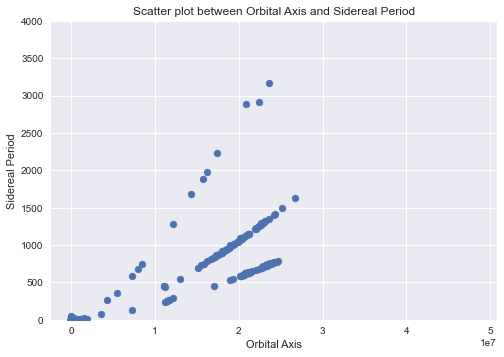

In [16]:
df_plot = df_corr[['Orbital_Axis', 'Sidereal_Period']]
plt.style.use('seaborn')
plt.scatter(df_plot.Orbital_Axis, df_plot.Sidereal_Period)
plt.ylim(0, 4000)
plt.ylabel('Sidereal Period')
plt.xlabel('Orbital Axis')
plt.title('Scatter plot between Orbital Axis and Sidereal Period')
plt.show()

"I pledge on my honor that I have not given nor received any unauthorized assistance on this assignment."
--MEET KETANKUMAR DOSHI